# Exploratory Data Analysis(EDA)

## Groupby

- The groupby is one of the most frequently used Pandas functions in data analysis. 
- It is used for grouping the data points (i.e. rows) based on the distinct values in the given column or columns. We can then calculate aggregated values for the generated groups.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cars = pd.read_csv("cars.csv")
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


## Group by one variable

- __Calculate__ the mean/average mpg __by origin__ (mean mpg for usa, for europe and for japan)! Who built the __least__ fuel efficient cars?

In [3]:
cars.groupby("origin").mpg.mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

- __Calculate__ the mean/average mpg __by model_year__ (mean mpg for the years 70, 71, ...). Can you see a __trend__? __Visualize__!

In [4]:
mpg_per_year = cars.groupby("model_year").mpg.mean()
mpg_per_year

model_year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    31.709677
Name: mpg, dtype: float64

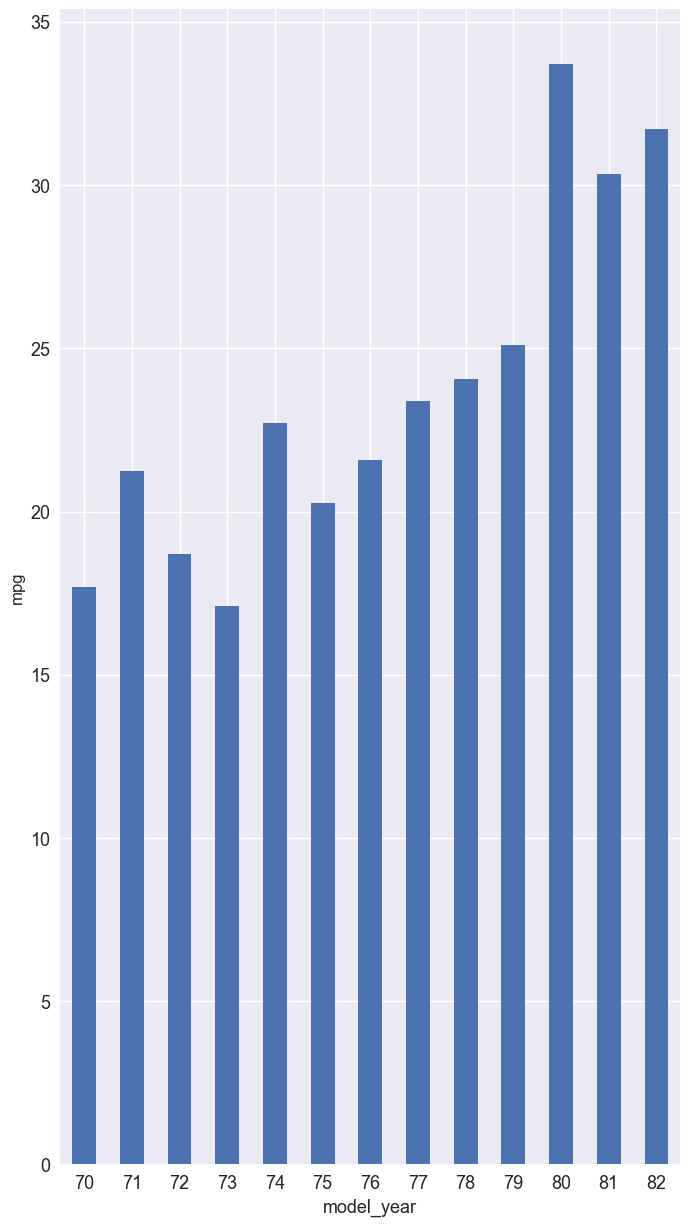

In [5]:
plt.style.use("seaborn")
mpg_per_year.plot(kind = "bar", figsize = (8,15), rot = 0, fontsize = 13) #mpg_per_year data is ploted on x-axis
plt.xlabel("model_year", fontsize =13)
plt.ylabel("mpg", fontsize = 12)
plt.show()

## Group by two variables 

- __Calculate__ the mean/average mpg for each __combination of 1) model_year & 2) origin__ and __visualize__ how the mean mpg evolved over time for usa, europe and japan. <br>
- Can you see the __same trend__ for all three orgins?

In [6]:
mpg_per_year_by_origin = cars.groupby(by = ["model_year", "origin"]).mpg.mean()

In [7]:
new_data = mpg_per_year_by_origin #unstacked/Pandas Series
new_data

model_year  origin
70          europe    25.200000
            japan     25.500000
            usa       15.272727
71          europe    28.750000
            japan     29.500000
            usa       18.100000
72          europe    22.000000
            japan     24.200000
            usa       16.277778
73          europe    24.000000
            japan     20.000000
            usa       15.034483
74          europe    27.000000
            japan     29.333333
            usa       18.333333
75          europe    24.500000
            japan     27.500000
            usa       17.550000
76          europe    24.250000
            japan     28.000000
            usa       19.431818
77          europe    29.250000
            japan     27.416667
            usa       20.722222
78          europe    24.950000
            japan     29.687500
            usa       21.772727
79          europe    30.450000
            japan     32.950000
            usa       23.478261
80          europe   

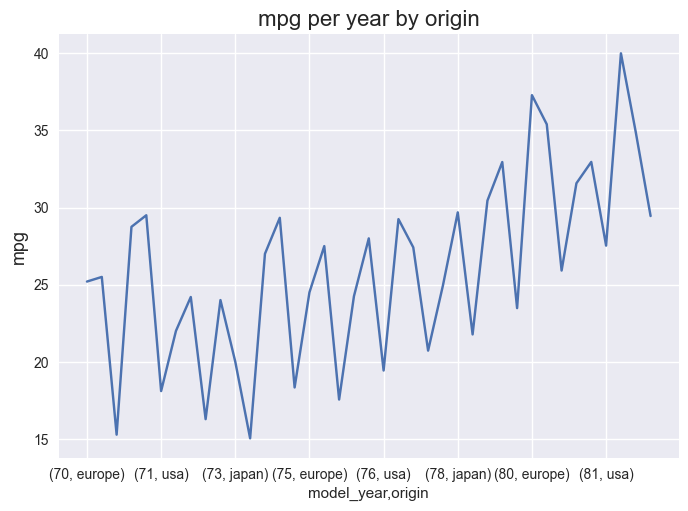

In [8]:
new_data.plot()
plt.ylabel("mpg", fontsize = 13)
plt.title("mpg per year by origin", fontsize = 16)
plt.show()

In [9]:
type(new_data)

pandas.core.series.Series

### stack and unstack

- We need a unstacked dataframe. 
- unstack() returns a dataFrame having a new level of column labels whose inner-most level consists of the pivoted index labels.

In [10]:
new_df = mpg_per_year_by_origin.unstack()
new_df

origin,europe,japan,usa
model_year,,,
70,25.200000,25.500000,15.272727
71,28.750000,29.500000,18.100000
72,22.000000,24.200000,16.277778
73,24.000000,20.000000,15.034483
74,27.000000,29.333333,18.333333
75,24.500000,27.500000,17.550000
76,24.250000,28.000000,19.431818
77,29.250000,27.416667,20.722222
78,24.950000,29.687500,21.772727


In [11]:
type(new_df) #dataframe

pandas.core.frame.DataFrame

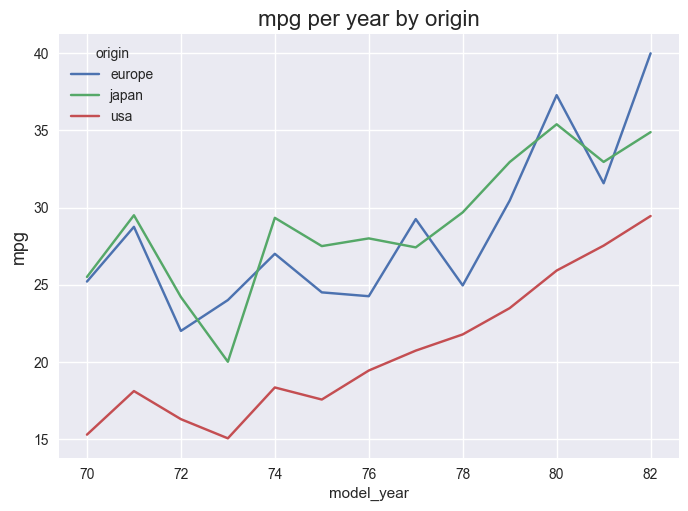

In [12]:
new_df.plot()
plt.ylabel("mpg", fontsize = 13)
plt.title("mpg per year by origin", fontsize = 16)
plt.show()

### aggregation(agg)

- To calculated aggregated values for the generated groups, use __pandas.DataFrame.agg()__. 
- Let's calculate the __mean__, __min__ and __max__ mpg for each combination of model_year & origin.

In [13]:
new_df

origin,europe,japan,usa
model_year,,,
70,25.200000,25.500000,15.272727
71,28.750000,29.500000,18.100000
72,22.000000,24.200000,16.277778
73,24.000000,20.000000,15.034483
74,27.000000,29.333333,18.333333
75,24.500000,27.500000,17.550000
76,24.250000,28.000000,19.431818
77,29.250000,27.416667,20.722222
78,24.950000,29.687500,21.772727


In [14]:
n1= cars.groupby(by = ["model_year", "origin"])["mpg"].agg(["mean", "min", "max"]).unstack().round(2)

In [15]:
n1

mean                  min                max            
origin     europe  japan    usa europe japan   usa europe japan   usa
model_year                                                           
70          25.20  25.50  15.27   24.0  24.0   9.0   26.0  27.0  22.0
71          28.75  29.50  18.10   27.0  25.0  12.0   30.0  35.0  28.0
72          22.00  24.20  16.28   18.0  19.0  11.0   26.0  28.0  28.0
73          24.00  20.00  15.03   19.0  18.0  11.0   29.0  22.0  23.0
74          27.00  29.33  18.33   24.0  24.0  13.0   31.0  32.0  28.0
75          24.50  27.50  17.55   22.0  24.0  13.0   29.0  33.0  23.0
76          24.25  28.00  19.43   16.5  19.0  13.0   29.5  33.0  29.0
77          29.25  27.42  20.72   21.5  21.5  15.0   36.0  33.5  33.5
78          24.95  29.69  21.77   16.2  21.1  17.5   43.1  39.4  36.1
79          30.45  32.95  23.48   25.4  31.8  15.5   37.3  34.1  35.7
80          37.29  35.40  25.91   29.8  23.7  19.1   44.3  46.6  32.1
81          31.58  32.96  27.53   28.1  24.2  17.6   34.5  39.1  39.0
82          40.00  34.89  29.45   36.0  31.0  22.0   44.0  38.0  38.0

## Swaplevel

- If we want the index arranged by origin, use __swaplevel__.

In [16]:
n1.columns = n1.columns.to_flat_index()

In [17]:
n1.columns

Index([('mean', 'europe'),  ('mean', 'japan'),    ('mean', 'usa'),
        ('min', 'europe'),   ('min', 'japan'),     ('min', 'usa'),
        ('max', 'europe'),   ('max', 'japan'),     ('max', 'usa')],
      dtype='object')

In [18]:
n1.head()

,"(mean, europe)","(mean, japan)","(mean, usa)","(min, europe)","(min, japan)","(min, usa)","(max, europe)","(max, japan)","(max, usa)"
model_year,,,,,,,,,
70,25.20,25.50,15.27,24.0,24.0,9.0,26.0,27.0,22.0
71,28.75,29.50,18.10,27.0,25.0,12.0,30.0,35.0,28.0
72,22.00,24.20,16.28,18.0,19.0,11.0,26.0,28.0,28.0
73,24.00,20.00,15.03,19.0,18.0,11.0,29.0,22.0,23.0
74,27.00,29.33,18.33,24.0,24.0,13.0,31.0,32.0,28.0


In [19]:
n1.columns = pd.MultiIndex.from_tuples(n1.columns)

In [20]:
n1.columns

MultiIndex([('mean', 'europe'),
            ('mean',  'japan'),
            ('mean',    'usa'),
            ( 'min', 'europe'),
            ( 'min',  'japan'),
            ( 'min',    'usa'),
            ( 'max', 'europe'),
            ( 'max',  'japan'),
            ( 'max',    'usa')],
           )

In [21]:
n1.swaplevel(axis = 1).sort_index(axis = 1)

europe              japan                usa             
              max   mean   min   max   mean   min   max   mean   min
model_year                                                          
70           26.0  25.20  24.0  27.0  25.50  24.0  22.0  15.27   9.0
71           30.0  28.75  27.0  35.0  29.50  25.0  28.0  18.10  12.0
72           26.0  22.00  18.0  28.0  24.20  19.0  28.0  16.28  11.0
73           29.0  24.00  19.0  22.0  20.00  18.0  23.0  15.03  11.0
74           31.0  27.00  24.0  32.0  29.33  24.0  28.0  18.33  13.0
75           29.0  24.50  22.0  33.0  27.50  24.0  23.0  17.55  13.0
76           29.5  24.25  16.5  33.0  28.00  19.0  29.0  19.43  13.0
77           36.0  29.25  21.5  33.5  27.42  21.5  33.5  20.72  15.0
78           43.1  24.95  16.2  39.4  29.69  21.1  36.1  21.77  17.5
79           37.3  30.45  25.4  34.1  32.95  31.8  35.7  23.48  15.5
80           44.3  37.29  29.8  46.6  35.40  23.7  32.1  25.91  19.1
81           34.5  31.58  28.1  39.1  32.96  24.2  39.0  27.53  17.6
82           44.0  40.00  36.0  38.0  34.89  31.0  38.0  29.45  22.0

## Transform

- While __aggregation__ must return a reduced version of the data, __transformation__ can return some transformed version of the full data to recombine. For such a transformation, the output is the same shape as the input. A common example is to center the data by subtracting the group-wise mean.
- It returns a self-produced dataframe with transformed values after applying the function specified in its parameter. This dataframe has the same length as the passed dataframe.
- Calculate the __mean mpg__ for each combination of model_year & origin and __assign__ the corresponding __group-specific value__ to all cars (__new column__!).<br>
Then, __filter__ all cars, where the __absolute difference__ between __mpg__ and __group-specific mpg__ is __greater than 10__. These cars are outliers/special cases in their respective group.

In [22]:
cars.groupby(by = ["model_year", "origin"]).mpg.mean()
#mpg mean for the us made car in 1970 was 15.272727

model_year  origin
70          europe    25.200000
            japan     25.500000
            usa       15.272727
71          europe    28.750000
            japan     29.500000
            usa       18.100000
72          europe    22.000000
            japan     24.200000
            usa       16.277778
73          europe    24.000000
            japan     20.000000
            usa       15.034483
74          europe    27.000000
            japan     29.333333
            usa       18.333333
75          europe    24.500000
            japan     27.500000
            usa       17.550000
76          europe    24.250000
            japan     28.000000
            usa       19.431818
77          europe    29.250000
            japan     27.416667
            usa       20.722222
78          europe    24.950000
            japan     29.687500
            usa       21.772727
79          europe    30.450000
            japan     32.950000
            usa       23.478261
80          europe   

In [23]:
cars.groupby(by = ["model_year", "origin"]).mpg.transform("mean")
#The group mpg mean of the row from that origin in that year

0      15.272727
1      15.272727
2      15.272727
3      15.272727
4      15.272727
         ...    
393    29.450000
394    40.000000
395    29.450000
396    29.450000
397    29.450000
Name: mpg, Length: 398, dtype: float64

In [24]:
cars["group_specific_value"] = cars.groupby(by = ["model_year", "origin"]).mpg.transform("mean")

In [25]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,group_specific_value
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,15.272727
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,15.272727
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,15.272727
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,15.272727
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,15.272727
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,29.450000
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,40.000000
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,29.450000
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,29.450000


In [26]:
cars["outliers"] = abs(cars.mpg-cars.group_specific_value)
#absolute values

In [27]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,group_specific_value,outliers
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,15.272727,2.727273
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,15.272727,0.272727
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,15.272727,2.727273
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,15.272727,0.727273
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,15.272727,1.727273
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,29.450000,2.450000
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,40.000000,4.000000
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,29.450000,2.550000
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,29.450000,1.450000


In [28]:
cars.outliers.describe() 

count    398.000000
mean       3.608832
std        2.773982
min        0.000000
25%        1.500000
50%        3.000000
75%        5.182692
max       18.150000
Name: outliers, dtype: float64

In [29]:
cars[cars.outliers > 10]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,group_specific_value,outliers
83,28.0,4,98.0,80.0,2164,15.0,72,usa,dodge colt (sw),16.277778,11.722222
238,33.5,4,98.0,83.0,2075,15.9,77,usa,dodge colt m/m,20.722222,12.777778
244,43.1,4,90.0,48.0,1985,21.5,78,europe,vw rabbit custom diesel,24.950000,18.150000
245,36.1,4,98.0,66.0,1800,14.4,78,usa,ford fiesta,21.772727,14.327273
295,35.7,4,98.0,80.0,1915,14.4,79,usa,dodge colt hatchback custom,23.478261,12.221739
301,34.2,4,105.0,70.0,2200,13.2,79,usa,plymouth horizon,23.478261,10.721739
302,34.5,4,105.0,70.0,2150,14.9,79,usa,plymouth horizon tc3,23.478261,11.021739
308,33.5,4,151.0,90.0,2556,13.2,79,usa,pontiac phoenix,23.478261,10.021739
322,46.6,4,86.0,65.0,2110,17.9,80,japan,mazda glc,35.400000,11.200000
334,23.7,3,70.0,100.0,2420,12.5,80,japan,mazda rx-7 gs,35.400000,11.700000


## Reshaping and pivoting

In [30]:
import pandas as pd

In [31]:
cars = pd.read_csv("cars.csv")

In [32]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


- Calculate the __mean mpg__ for all combinations of __model_year__ and __origin__. __Save__ the resulting DataFrame in the variable __mpg_year_origin__.

In [33]:
cars.groupby(by = ["model_year", "origin"]).mpg.mean()#.unstack()

model_year  origin
70          europe    25.200000
            japan     25.500000
            usa       15.272727
71          europe    28.750000
            japan     29.500000
            usa       18.100000
72          europe    22.000000
            japan     24.200000
            usa       16.277778
73          europe    24.000000
            japan     20.000000
            usa       15.034483
74          europe    27.000000
            japan     29.333333
            usa       18.333333
75          europe    24.500000
            japan     27.500000
            usa       17.550000
76          europe    24.250000
            japan     28.000000
            usa       19.431818
77          europe    29.250000
            japan     27.416667
            usa       20.722222
78          europe    24.950000
            japan     29.687500
            usa       21.772727
79          europe    30.450000
            japan     32.950000
            usa       23.478261
80          europe   

In [34]:
mpg_year_origin = cars.groupby(by = ["model_year", "origin"]).mpg.mean().unstack().round(2)
mpg_year_origin

origin,europe,japan,usa
model_year,,,
70,25.20,25.50,15.27
71,28.75,29.50,18.10
72,22.00,24.20,16.28
73,24.00,20.00,15.03
74,27.00,29.33,18.33
75,24.50,27.50,17.55
76,24.25,28.00,19.43
77,29.25,27.42,20.72
78,24.95,29.69,21.77


### Melt (wide to long format)

- Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
- This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.
- Melt the dataframe mpg_year_origin! Resulting long-format DataFrame shall have two columns origin and mpg. Model_year shall be the index.

In [35]:
mpg_year_origin.index

Int64Index([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype='int64', name='model_year')

In [36]:
mpg_year_origin.reset_index(inplace = True)

In [37]:
mpg_year_origin

origin,model_year,europe,japan,usa
0,70,25.20,25.50,15.27
1,71,28.75,29.50,18.10
2,72,22.00,24.20,16.28
3,73,24.00,20.00,15.03
4,74,27.00,29.33,18.33
5,75,24.50,27.50,17.55
6,76,24.25,28.00,19.43
7,77,29.25,27.42,20.72
8,78,24.95,29.69,21.77
9,79,30.45,32.95,23.48


In [38]:
mpg_year_origin = mpg_year_origin.melt(id_vars= "model_year", value_vars= ["europe", "japan", "usa"], var_name = "origin", value_name = "mpg")

In [39]:
mpg_year_origin

,model_year,origin,mpg
0,70,europe,25.20
1,71,europe,28.75
2,72,europe,22.00
3,73,europe,24.00
4,74,europe,27.00
5,75,europe,24.50
6,76,europe,24.25
7,77,europe,29.25
8,78,europe,24.95
9,79,europe,30.45


### Pivot (long to wide format)

- DataFrame.pivot() return reshaped DataFrame organized by given index / column values.
- __Pivot__ mean_mpg! Resulting wide-format DataFrame shall have three columns europe, japan and usa. Model_year shall be the __index__!<br>
__Save__ new DataFrame in the variable __pivot__!

In [40]:
mpg_year_origin

,model_year,origin,mpg
0,70,europe,25.20
1,71,europe,28.75
2,72,europe,22.00
3,73,europe,24.00
4,74,europe,27.00
5,75,europe,24.50
6,76,europe,24.25
7,77,europe,29.25
8,78,europe,24.95
9,79,europe,30.45


In [41]:
pivot = mpg_year_origin.pivot(index = "model_year", columns = "origin", values = "mpg")
pivot

origin,europe,japan,usa
model_year,,,
70,25.20,25.50,15.27
71,28.75,29.50,18.10
72,22.00,24.20,16.28
73,24.00,20.00,15.03
74,27.00,29.33,18.33
75,24.50,27.50,17.55
76,24.25,28.00,19.43
77,29.25,27.42,20.72
78,24.95,29.69,21.77


### Transpose

- Transpose() reflects the DataFrame over its main diagonal by writing rows as columns and vice-versa. 
- Transpose the multiindex of origin and model_year.

In [42]:
mpg_year_origin #long format

,model_year,origin,mpg
0,70,europe,25.20
1,71,europe,28.75
2,72,europe,22.00
3,73,europe,24.00
4,74,europe,27.00
5,75,europe,24.50
6,76,europe,24.25
7,77,europe,29.25
8,78,europe,24.95
9,79,europe,30.45


In [43]:
mpg_year_origin.set_index(["origin", "model_year"], inplace = True)

In [44]:
mpg_year_origin

mpg
origin model_year       
europe 70          25.20
       71          28.75
       72          22.00
       73          24.00
       74          27.00
       75          24.50
       76          24.25
       77          29.25
       78          24.95
       79          30.45
       80          37.29
       81          31.58
       82          40.00
japan  70          25.50
       71          29.50
       72          24.20
       73          20.00
       74          29.33
       75          27.50
       76          28.00
       77          27.42
       78          29.69
       79          32.95
       80          35.40
       81          32.96
       82          34.89
usa    70          15.27
       71          18.10
       72          16.28
       73          15.03
       74          18.33
       75          17.55
       76          19.43
       77          20.72
       78          21.77
       79          23.48
       80          25.91
       81          27.53
       82          29.45

In [45]:
mpg_year_origin.transpose()

origin     europe                                                             \
model_year     70     71    72    73    74    75     76     77     78     79   
mpg          25.2  28.75  22.0  24.0  27.0  24.5  24.25  29.25  24.95  30.45   

origin      ...    usa                                                   \
model_year  ...     73     74     75     76     77     78     79     80   
mpg         ...  15.03  18.33  17.55  19.43  20.72  21.77  23.48  25.91   

origin                    
model_year     81     82  
mpg         27.53  29.45  

[1 rows x 39 columns]

### Crosstab

- __crosstab()__ method is used to compute a simple cross-tabulation of two (or more) factors. By default, computes a frequency table of the factors unless an array of values and an aggregation function are passed.
- Return the number of cars for each combination of model_year and origin__ with __pd.crosstab()__ (e.g. 5 cars from europe in 1970)!

In [46]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [47]:
cars.groupby(["model_year", "origin"]).origin.count().unstack(fill_value = 0)
#it's good but no sum

origin,europe,japan,usa
model_year,,,
70,5,2,22
71,4,4,20
72,5,5,18
73,7,4,29
74,6,6,15
75,6,4,20
76,8,4,22
77,4,6,18
78,6,8,22


In [48]:
pd.crosstab(index = cars.model_year, columns = cars.origin, aggfunc = "count",
            values = cars.origin, margins = True).fillna(0)
#multi-index
#replace NaN with this value if the unstack produces missing values.

origin,europe,japan,usa,All
model_year,,,,
70,5,2,22,29
71,4,4,20,28
72,5,5,18,28
73,7,4,29,40
74,6,6,15,27
75,6,4,20,30
76,8,4,22,34
77,4,6,18,28
78,6,8,22,36


## Data creation and feature creation

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [50]:
cars = pd.read_csv("cars.csv")

In [51]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [52]:
cars.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevrolet s-10


In [53]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


- __Transform__ the format in the model_year column to __full year format__ (e.g. 1970 instead of 70)!

In [54]:
cars.model_year = cars.model_year.add(1900)

In [55]:
cars.model_year.value_counts()

1973    40
1978    36
1976    34
1982    31
1975    30
1970    29
1979    29
1980    29
1981    29
1971    28
1972    28
1977    28
1974    27
Name: model_year, dtype: int64

- Transform the __mpg__ column in way that the relationship with the horsepower feature is __linear__/closer to linear!<br> __Visualize__ before and after!<br> <br>
(Hint: Gallons per 100 miles might be a good format) 

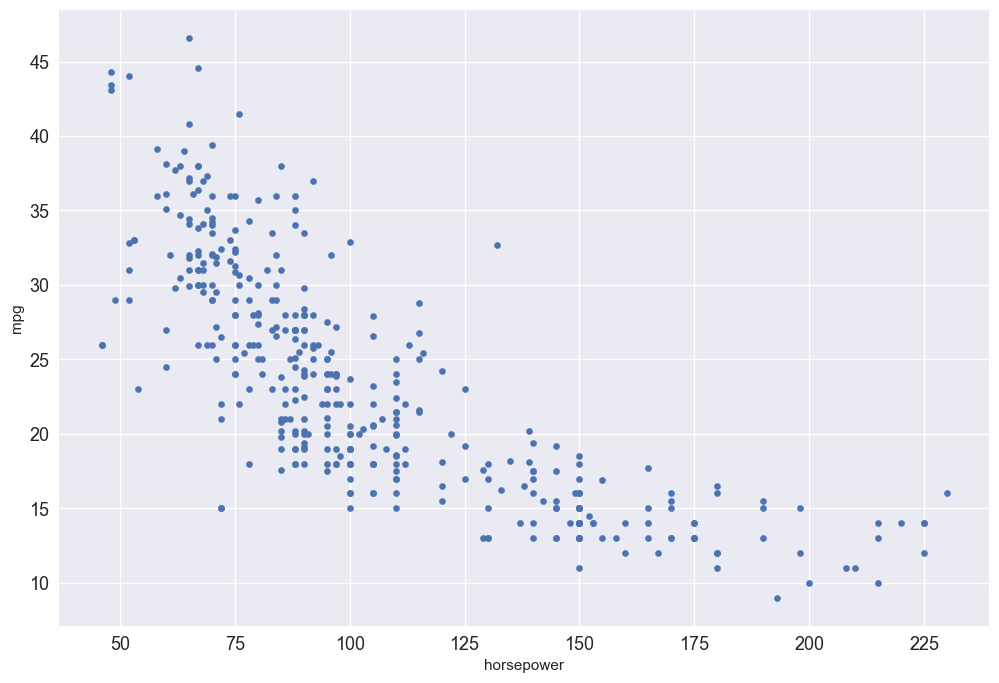

In [56]:
cars.plot(kind = "scatter", x = "horsepower", y = "mpg", figsize= (12, 8), fontsize= 13)
plt.show()

In [57]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino


In [58]:
cars["gpm"] = (1/cars.mpg*100).round(2)

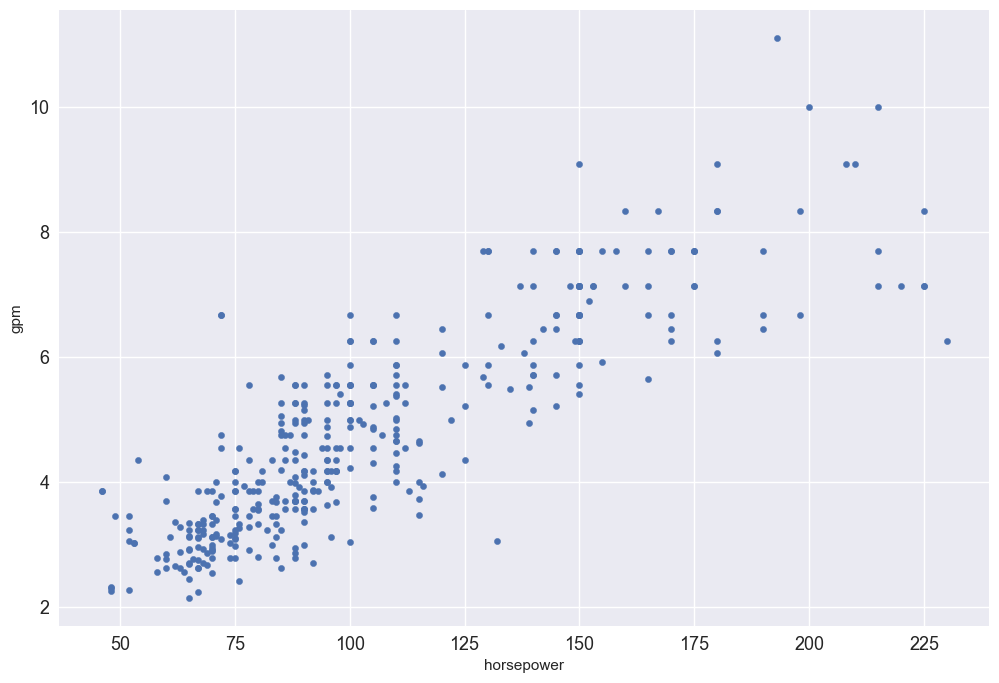

In [59]:
cars.plot(kind = "scatter", x = "horsepower", y = "gpm" , figsize= (12, 8), fontsize= 13)
plt.show()

- Create a __new column__ with the __manufacturer__ name!

In [60]:
cars.name.str.split(" ", n = 1, expand = True)#[0]

,0,1
0,chevrolet,chevelle malibu
1,buick,skylark 320
2,plymouth,satellite
3,amc,rebel sst
4,ford,torino
...,...,...
393,ford,mustang gl
394,vw,pickup
395,dodge,rampage
396,ford,ranger


In [61]:
cars["manufacturer"] = cars.name.str.split(" ", n = 1, expand = True)[0]

In [62]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gpm,manufacturer
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu,5.56,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320,6.67,buick
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite,5.56,plymouth
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst,6.25,amc
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino,5.88,ford


In [63]:
cars.manufacturer.value_counts()

ford             51
chevrolet        47
plymouth         31
amc              28
dodge            28
toyota           26
datsun           23
vw               22
buick            17
pontiac          16
honda            13
mercury          12
mazda            12
oldsmobile       10
peugeot           8
fiat              8
audi              7
chrysler          6
volvo             6
renault           5
subaru            4
opel              4
saab              4
mercedes-benz     3
bmw               2
cadillac          2
triumph           1
ih                1
nissan            1
Name: manufacturer, dtype: int64

### Mapping

- Pandas map() function from Series is used to substitute each value in a Series with another value, that may be derived from a function, a dictionary or a Series.
- Add a __new column__ with the respective __continent__ (north america, asia, europe).

In [64]:
mapper = {"usa":"north america", "europe":"europe", "japan":"asia"} #dictionary

In [65]:
cars["continent"] = cars.origin.map(mapper)

In [66]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gpm,manufacturer,continent
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu,5.56,chevrolet,north america
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320,6.67,buick,north america
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite,5.56,plymouth,north america
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst,6.25,amc,north america
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino,5.88,ford,north america


- __Visualize__ and inspect whether there are any __extreme values__ / outliers in the __numerical columns__ that are worth to be __capped__ / __floored__!

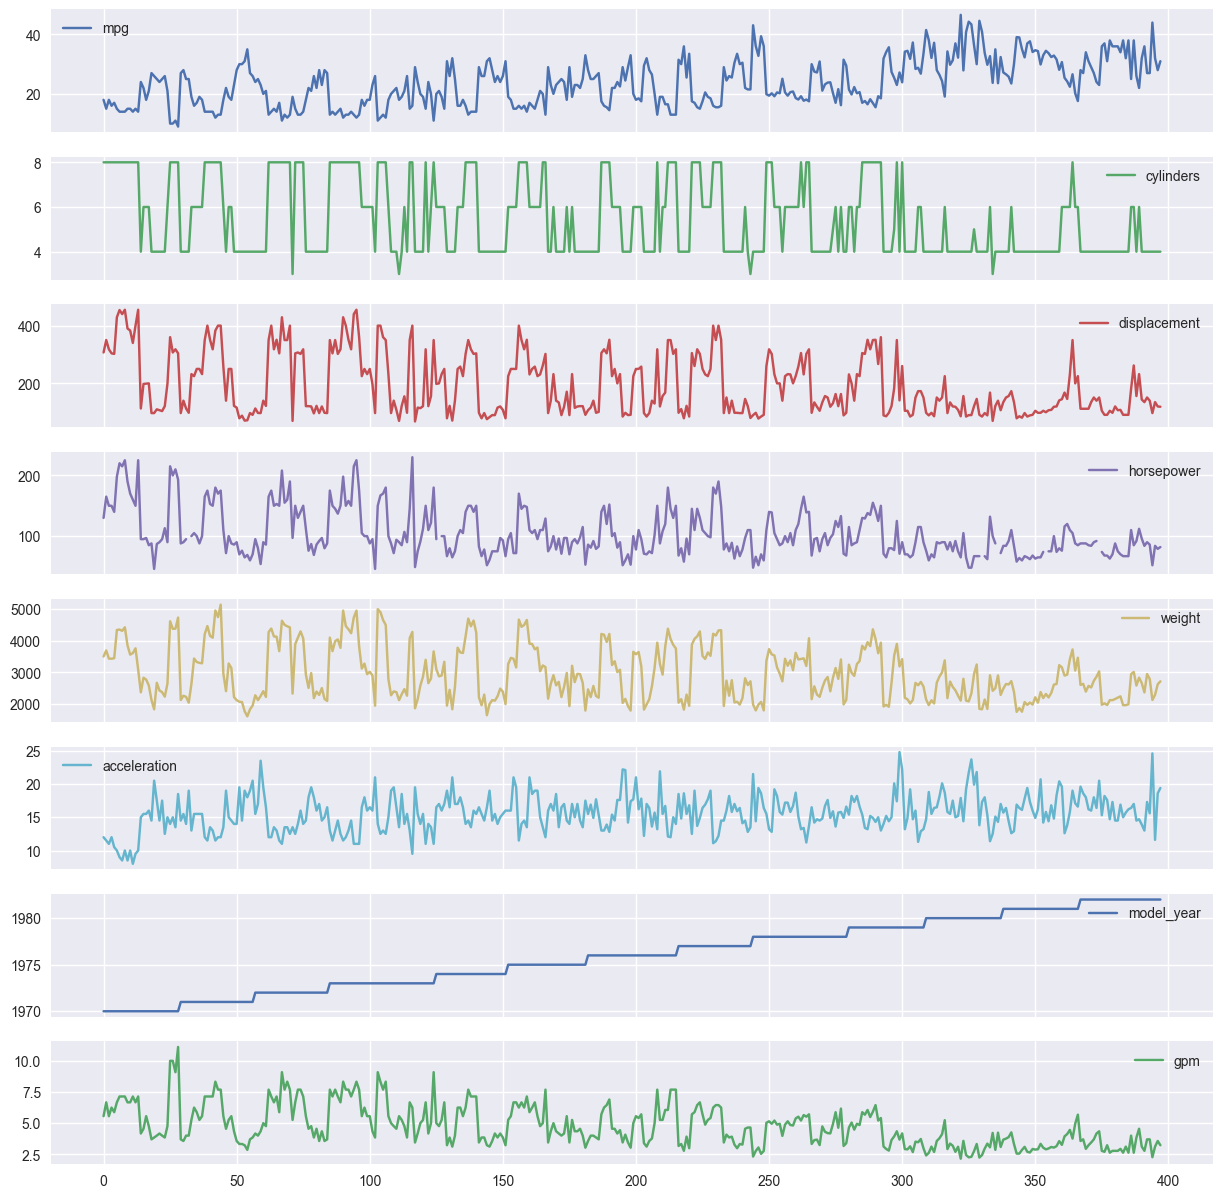

In [67]:
cars.plot(figsize = (15,15), subplots = True)
plt.show()

### Qcut

- Quantile-based discretization function <br>
- Discretize variable into equal-sized buckets based on rank or based on sample quantiles. For example 1000 values for 10 quantiles would produce a Categorical object indicating quantile membership for each data point.
- __Bin / discretize__ the __weight__ column! The __25%__ of cars with the __lowest weight__ shall get the label __"light"__, the __25%__ of cars with the __highest weight__ shall get the label __"heavy"__ and the remaining __50%__ the label __"medium"__! Create a new column "weight_cat".

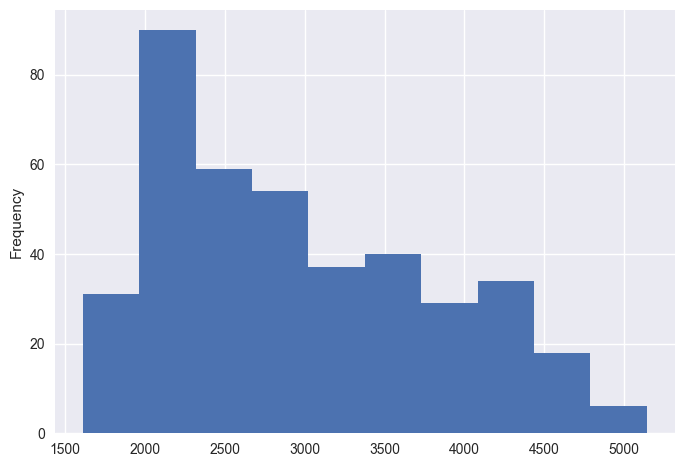

In [68]:
cars.weight.plot(kind = "hist")
plt.show()

In [69]:
labels = ["light", "medium", "heavy"]

In [70]:
pd.qcut(cars.weight, q = [0, 0.25, 0.75,1], labels = labels).value_counts()

medium    198
light     100
heavy     100
Name: weight, dtype: int64

In [71]:
cars["weight_cat"] = pd.qcut(cars.weight, q = [0, 0.25, 0.75,1], labels = labels)

In [72]:
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,gpm,manufacturer,continent,weight_cat
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu,5.56,chevrolet,north america,medium
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320,6.67,buick,north america,heavy
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite,5.56,plymouth,north america,medium
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst,6.25,amc,north america,medium
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,ford torino,5.88,ford,north america,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,1982,usa,ford mustang gl,3.70,ford,north america,medium
394,44.0,4,97.0,52.0,2130,24.6,1982,europe,vw pickup,2.27,vw,europe,light
395,32.0,4,135.0,84.0,2295,11.6,1982,usa,dodge rampage,3.12,dodge,north america,medium
396,28.0,4,120.0,79.0,2625,18.6,1982,usa,ford ranger,3.57,ford,north america,medium


- __Drop__ the columns "cylinders", "displacement", "weight", "acceleration", "name", "mpg"!

In [73]:
cars.drop(columns = ["cylinders", "displacement", "weight", "acceleration", "name", "manufacturer", "mpg"], inplace = True)

In [74]:
cars.head()

,horsepower,model_year,origin,gpm,continent,weight_cat
0,130.0,1970,usa,5.56,north america,medium
1,165.0,1970,usa,6.67,north america,heavy
2,150.0,1970,usa,5.56,north america,medium
3,150.0,1970,usa,6.25,north america,medium
4,140.0,1970,usa,5.88,north america,medium


### Standardization: scaling by Z-scores

- Bring the columns __horsepower__ and the __gpm__ column that you created to the same __scale__ by calculating __z-scores__.
- Visualize before and after!

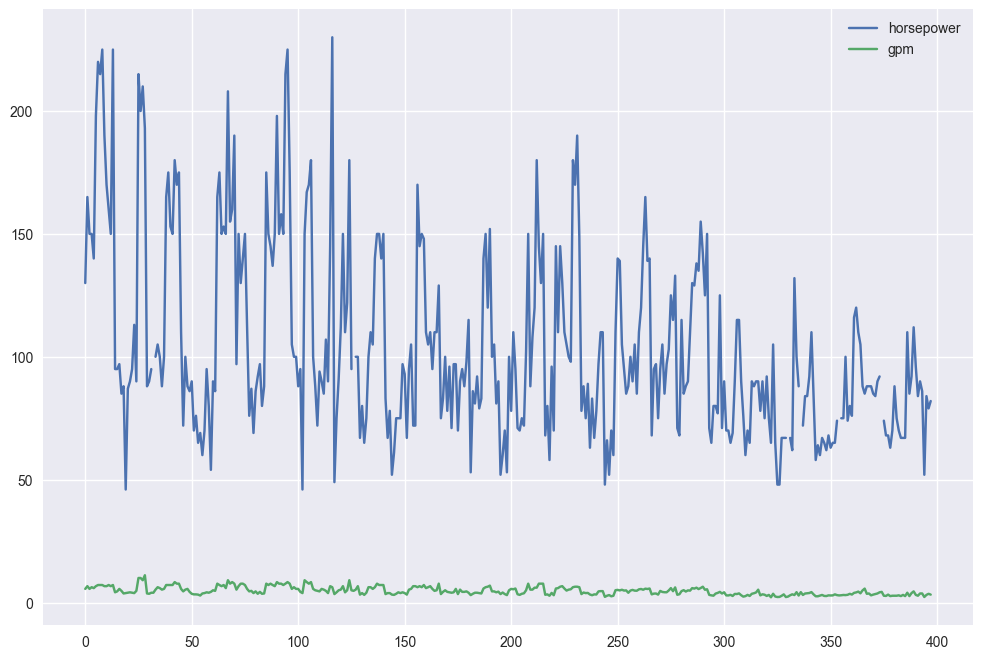

In [75]:
cars.loc[:, ["horsepower", "gpm"]].plot(figsize = (12,8))
plt.show()

In [76]:
cars["gpm_z"] = round((cars.gpm-cars.gpm.mean()) / cars.gpm.std(),2)
cars["horsepower_z"] = round((cars.horsepower-cars.horsepower.mean()) / cars.horsepower.std(),2)

In [77]:
cars.head()

,horsepower,model_year,origin,gpm,continent,weight_cat,gpm_z,horsepower_z
0,130.0,1970,usa,5.56,north america,medium,0.48,0.66
1,165.0,1970,usa,6.67,north america,heavy,1.15,1.57
2,150.0,1970,usa,5.56,north america,medium,0.48,1.18
3,150.0,1970,usa,6.25,north america,medium,0.89,1.18
4,140.0,1970,usa,5.88,north america,medium,0.67,0.92


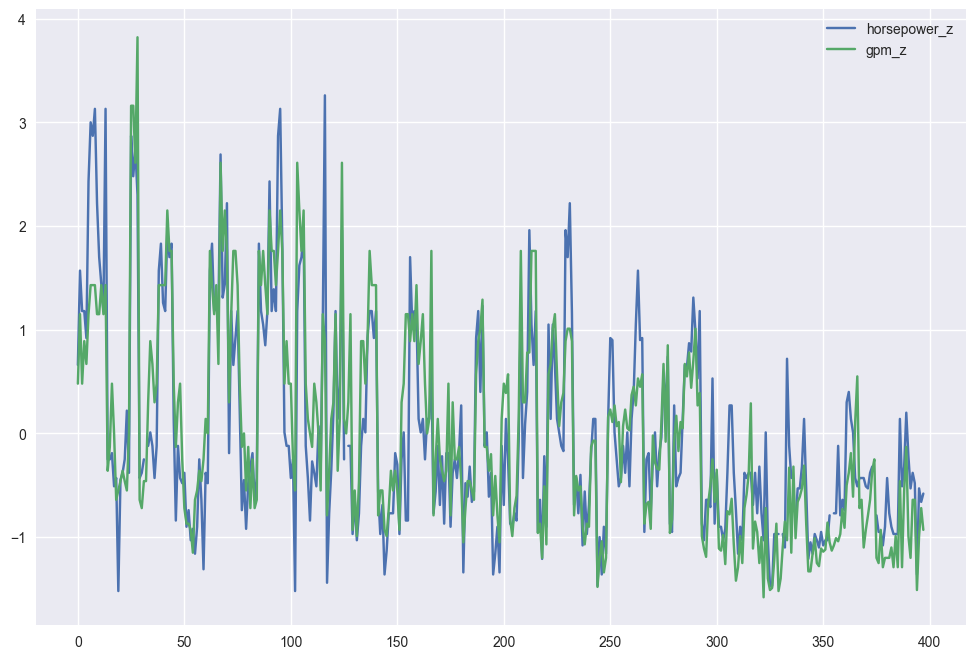

In [78]:
cars.loc[:, ["horsepower_z", "gpm_z"]].plot(figsize = (12,8))
plt.show()

### Dummy variable: get_dummies

- __Transform__ the columns __model_year__ and __origin__ into (k-1) columns with __dummy variables__!

In [79]:
cars.head()

,horsepower,model_year,origin,gpm,continent,weight_cat,gpm_z,horsepower_z
0,130.0,1970,usa,5.56,north america,medium,0.48,0.66
1,165.0,1970,usa,6.67,north america,heavy,1.15,1.57
2,150.0,1970,usa,5.56,north america,medium,0.48,1.18
3,150.0,1970,usa,6.25,north america,medium,0.89,1.18
4,140.0,1970,usa,5.88,north america,medium,0.67,0.92


In [80]:
cars = pd.get_dummies(cars, columns = ["origin"], drop_first = True)

In [81]:
cars.head()

,horsepower,model_year,gpm,continent,weight_cat,gpm_z,horsepower_z,origin_japan,origin_usa
0,130.0,1970,5.56,north america,medium,0.48,0.66,0,1
1,165.0,1970,6.67,north america,heavy,1.15,1.57,0,1
2,150.0,1970,5.56,north america,medium,0.48,1.18,0,1
3,150.0,1970,6.25,north america,medium,0.89,1.18,0,1
4,140.0,1970,5.88,north america,medium,0.67,0.92,0,1


In [82]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   horsepower    392 non-null    float64 
 1   model_year    398 non-null    int64   
 2   gpm           398 non-null    float64 
 3   continent     398 non-null    object  
 4   weight_cat    398 non-null    category
 5   gpm_z         398 non-null    float64 
 6   horsepower_z  392 non-null    float64 
 7   origin_japan  398 non-null    uint8   
 8   origin_usa    398 non-null    uint8   
dtypes: category(1), float64(4), int64(1), object(1), uint8(2)
memory usage: 20.1+ KB
